# Communities

In [4]:
%pylab inline
import powerlaw
print(powerlaw.__version__)

import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib
1.4.4


/Users/Merryous/Repos/NetworkAnalysis/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rc', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


0.2659452243010437


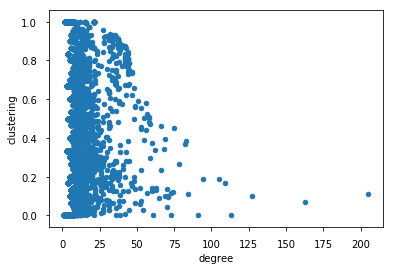

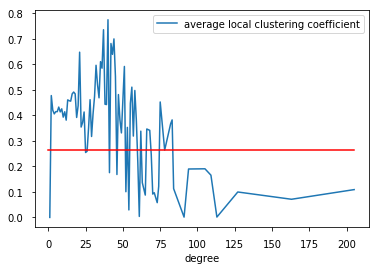

In [95]:
import networkx as nx
from collections import Counter
from scipy import stats
import pandas as pd
import matplotlib.lines as mlines

A = np.loadtxt('Data/arenas-pgp/out.arenas-pgp', dtype=int, usecols=range(2), comments="%")
G=nx.Graph()
for n in A:
    G.add_edge(n[0], n[1])

avg_clustering = nx.average_clustering(G)
print(avg_clustering)
clustering = nx.clustering(G)
degCoeff = [] #node, degree, clustering coefficient
for deg in G.degree():
    coeff = clustering[deg[0]]
    deg = deg + (coeff,)
    degCoeff.append(deg)

degrees = [degree for node, degree, c in degCoeff]  
coefficients = [c for node, degree, c in degCoeff]  

df = pd.DataFrame({'degree': degrees, 'clustering': coefficients})
grouped = df.groupby('degree')['clustering'].mean().reset_index()
grouped.columns = ['degree', 'average local clustering coefficient']
ax0 = df.plot.scatter(x='degree', y='clustering')
ax1 = grouped.plot(x='degree', y='average local clustering coefficient')
l = mlines.Line2D([0,205], [avg_clustering,avg_clustering], color='red', label='average clustering coefficient')
ax1.add_line(l)

In [3]:
import community
import networkx as nx
import matplotlib.pyplot as plt

# Compute the partition of the graph nodes which maximises the modularity (or try..) 
# using the Louvain heuristices
# This is the partition of highest modularity, i.e. the highest partition of the dendrogram 
# generated by the Louvain algorithm.
partition = community.best_partition(G)
print(partition)
modularity = community.modularity(partition, G)
print("modularity: "+ str(modularity))

{1: 0, 2: 0, 617: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 26: 1, 1251: 1, 1266: 1, 1272: 1, 1299: 1, 1300: 1, 1301: 1, 1313: 1, 1408: 1, 1470: 1, 1530: 1, 1533: 1, 1537: 1, 1540: 1, 1548: 1, 1613: 1, 1933: 1, 1934: 1, 1935: 1, 1936: 1, 1937: 1, 1938: 1, 1939: 1, 1940: 1, 1941: 1, 1942: 1, 1943: 1, 1944: 1, 1945: 1, 1947: 1, 1948: 1, 1950: 1, 1951: 1, 1952: 1, 1953: 1, 1954: 1, 1955: 1, 1956: 1, 1957: 1, 1958: 1, 2582: 1, 2838: 1, 4041: 1, 4045: 1, 5737: 1, 8335: 1, 5828: 2, 1274: 1, 1293: 1, 1294: 1, 1295: 1, 1785: 1, 2713: 1, 2716: 1, 2719: 1, 2720: 1, 6236: 1, 6237: 1, 6239: 1, 1269: 1, 9145: 1, 9852: 3, 9945: 1, 8: 4, 9: 4, 10: 4, 4613: 4, 1744: 4, 11: 5, 12: 5, 13: 5, 338: 1, 1283: 1, 7352: 5, 7353: 5, 7558: 5, 7559: 5, 7560: 5, 7561: 5, 7562: 5, 14: 6, 15: 6, 16: 6, 17: 6, 18: 6, 8709: 6, 773: 6, 8337: 6, 8710: 6, 9318: 6, 6796: 6, 19: 6, 20: 6, 697: 6, 21: 7, 22: 7, 9879: 7, 23: 8, 24: 8, 25: 8, 27: 8, 28: 8, 29: 8, 30: 8, 31: 8, 32: 8, 33: 8, 34: 8, 35: 8, 36: 8, 37: 8, 38: 8, 39: 8, 4

In [ ]:
communities = {}
for key, value in sorted(partition.items()):
    communities.setdefault(value, []).append(key)

for m, nodes in communities.items():
    H = G.subgraph(nodes)
    s = list([100+degree ** 2.2 for node, degree in G.degree(nodes)])
    degrees = {}
    for node, degree in G.degree(nodes):
        degrees[node] = degree
    plt.gcf().clear()
    #nx.draw(H,pos=nx.spring_layout(H), node_color=list(degrees.values()), node_size=s, cmap=plt.cm.tab20)
    pos=nx.spring_layout(H, scale=5.0, iterations=500)

    cm = plt.cm.coolwarm
    ec = nx.draw_networkx_edges(H, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(H, pos, nodelist=H.nodes(), node_color=list(degrees.values()), 
                            with_labels=False, node_size=s, cmap=cm)
    
    plt.colorbar(nc)

    plt.axis('off')
    plt.savefig("output/"+str(m)+'.png', bbox_inches='tight')

Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.
The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

In [8]:
#Betweenness centrality measures the number of times a node lies on the shortest path between other nodes.
# This measure shows which nodes act as ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one.
betweenness_centrality = nx.betweenness_centrality(G)

0.13118948721526424


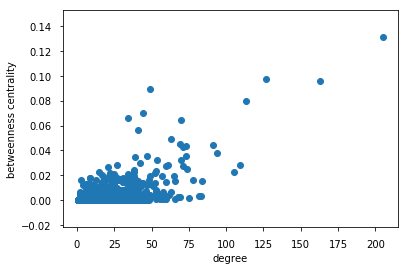

In [45]:
centralities = {} #node, degree, betweenness centrality
for deg in G.degree():
    bet_cen = betweenness_centrality[deg[0]]
    centralities[deg[0]] = (deg[1], bet_cen)
    
degs = [deg for deg, cen in centralities.values()]
cents = [cen for deg, cen in centralities.values()]
print(np.max(cents))
   
fig, ax = plt.subplots()
plt.xlabel('degree')
plt.ylabel('betweenness centrality')
ax.scatter(degs, cents)
l = mlines.Line2D([0,205], [0.04,0.04], color='red')

#transform = ax.transAxes
#l.set_transform(transform)
#ax.add_line(l)


In [38]:
#Degree centrality assigns an importance score based purely on the number of links held by each node.
degree_centrality = nx.degree_centrality(G)

In [6]:
# This measure scores each node based on their ‘closeness’ to all other nodes within the network.
closeness_centrality = nx.closeness_centrality(G)

In [28]:
#Mean shortest distance
def msd(shortestpaths):
    msds = {}
    for node, sds in shortestpaths:
        msds[node] = np.mean(list(sds.values()))
        print(msds[node])

    return msds

paths = nx.shortest_path_length(G) #dict[source][target] = Length
msds = msd(paths)

11.339044943820225
10.339232209737828
9.339606741573034
6.096535580524344
5.13436329588015
6.0948501872659175
5.915543071161049
5.906647940074906
4.746816479400749
4.424063670411985
5.002247191011236
4.912078651685393
5.009176029962547
5.116198501872659
5.11629213483146
4.796441947565543
5.139044943820225
4.937078651685393
5.019101123595505
4.878932584269663
5.103932584269663
4.947003745318352
4.796910112359551
5.258239700374532
5.218071161048689
5.2438202247191015
5.062359550561798
5.308426966292135
5.225374531835206
5.211797752808989
5.277153558052435
5.225280898876404
5.201123595505618
5.251779026217228
5.049812734082397
5.478464419475656
5.227715355805244
5.2196629213483146
5.069194756554307
5.236704119850187
5.231179775280899
5.247846441947566
5.228558052434457
5.257490636704119
5.052153558052434
5.232677902621723
5.2325842696629215
5.225280898876404
5.201310861423221
5.228183520599251
5.318913857677902
5.7913857677902625
6.097378277153558
6.117602996254682
6.745131086142322
5.255

6.1367041198501875
6.259082397003746
6.126685393258427
6.111610486891386
6.113951310861423
6.152153558052435
6.2558052434456926
6.263202247191011
6.259082397003746
6.287734082397003
6.260767790262173
6.561797752808989
6.983239700374532
6.770599250936329
7.299719101123595
6.561704119850187
6.745318352059925
6.607958801498127
7.302621722846442
7.303183520599251
7.303183520599251
6.045318352059925
5.645692883895131
5.6486891385767795
5.7906367041198505
5.880056179775281
5.759644194756555
5.495131086142322
5.194943820224719
6.202996254681648
5.631460674157303
6.2015917602996256
5.986797752808989
6.200093632958802
6.195131086142322
5.851966292134832
5.325842696629214
6.152153558052435
6.221348314606741
6.189138576779026
5.97687265917603
6.226779026217229
6.193820224719101
5.498033707865169
5.856179775280899
5.890355805243446
6.221441947565543
6.226779026217229
6.226779026217229
6.226779026217229
7.76938202247191
7.861985018726592
6.828932584269663
6.801685393258427
7.862546816479401
5.29288

7.253932584269663
7.252247191011236
7.25374531835206
7.253932584269663
6.8514981273408235
6.746441947565543
6.8514981273408235
8.308895131086143
7.3090823970037455
6.5710674157303375
7.308801498127341
7.208895131086142
7.953651685393258
7.308988764044944
7.953651685393258
11.638951310861422
12.638389513108613
11.63876404494382
10.639794007490636
12.63876404494382
12.638576779026216
11.639138576779025
9.641011235955057
7.672752808988764
6.672940074906367
5.9232209737827715
7.672191011235955
10.317041198501872
9.317228464419475
8.317602996254681
10.432209737827716
9.432584269662922
11.432022471910113
8.43314606741573
8.922097378277154
7.9222846441947565
6.9226591760299625
7.212640449438203
8.2124531835206
7.212827715355806
7.212827715355806
7.2124531835206
7.211610486891386
7.21123595505618
7.212827715355806
7.20561797752809
7.211516853932585
7.212640449438203
7.212265917602997
7.211142322097379
5.874063670411985
7.135486891385768
7.211891385767791
7.212827715355806
7.182771535580525
7.2

6.7434456928838955
6.744475655430712
7.112172284644195
5.748595505617978
6.742322097378278
6.7434456928838955
6.7434456928838955
5.225561797752809
6.115168539325842
5.588857677902622
6.742228464419476
7.117041198501872
8.700374531835205
7.700561797752809
7.700655430711611
9.642134831460675
10.498501872659176
9.499438202247191
11.498314606741573
11.497940074906367
12.497752808988764
12.497752808988764
9.642883895131087
10.642509363295881
7.914044943820224
9.642883895131087
9.64307116104869
9.64307116104869
9.64307116104869
9.64307116104869
9.64307116104869
9.64307116104869
9.64307116104869
5.543820224719101
6.087921348314607
6.246348314606742
5.986797752808989
5.913295880149812
5.7089887640449435
5.438389513108614
6.38558052434457
4.925374531835206
5.949906367041199
5.439887640449438
6.187453183520599
6.2982209737827715
6.109456928838951
6.10936329588015
5.670131086142322
5.435767790262172
7.071161048689139
7.070973782771536
7.070973782771536
7.070973782771536
7.018913857677902
7.070973

7.696722846441948
7.696722846441948
7.6308052434456926
7.635767790262173
6.426404494382022
7.696722846441948
7.696348314606742
6.938857677902622
7.651310861423221
7.696722846441948
6.641385767790262
7.696535580524345
5.996629213483146
6.814325842696629
6.805992509363296
7.258895131086143
7.305711610486892
7.8044943820224715
6.894756554307116
7.627902621722846
8.509082397003745
8.508895131086142
8.513670411985018
7.534644194756554
7.016479400749064
7.635674157303371
8.511048689138576
8.510580524344569
8.516573033707866
8.516573033707866
7.258146067415731
8.256086142322097
8.630243445692884
6.891573033707865
6.807022471910113
6.891104868913858
6.477059925093633
6.34063670411985
5.617509363295881
6.891573033707865
6.475749063670412
6.890823970037453
6.890262172284644
6.891573033707865
6.477340823970038
6.476966292134832
6.891573033707865
6.891573033707865
6.891573033707865
8.635393258426966
8.635393258426966
7.30440074906367
5.4632022471910116
8.696161048689138
8.696161048689138
7.9386704

9.698876404494381
9.698876404494381
9.695131086142322
9.696816479400749
10.692322097378277
10.693071161048689
10.691947565543071
10.692790262172284
7.097471910112359
7.096722846441947
7.097378277153558
7.097378277153558
6.015543071161049
5.988014981273408
5.818071161048689
6.06376404494382
5.977621722846442
6.034644194756554
5.033239700374532
5.8088951310861425
6.0891385767790265
6.089044943820225
6.086891385767791
5.997846441947566
6.0893258426966295
6.0893258426966295
5.664232209737828
6.0893258426966295
5.910112359550562
6.0893258426966295
6.0893258426966295
6.0893258426966295
6.050093632958801
6.088483146067416
6.0885767790262175
6.0889513108614235
5.867041198501872
5.992602996254682
6.086891385767791
6.0893258426966295
6.0887640449438205
6.0893258426966295
6.0893258426966295
5.950842696629214
6.0889513108614235
6.0893258426966295
6.0893258426966295
6.0893258426966295
6.063951310861423
6.0893258426966295
6.0893258426966295
6.754681647940075
6.508146067415731
9.164513108614232
8.164

9.435674157303371
11.434737827715356
10.853932584269662
10.853932584269662
10.851966292134831
7.106086142322098
8.105898876404494
8.105149812734082
7.1072097378277155
9.104962546816479
9.104681647940074
9.104775280898876
9.774157303370787
8.775749063670412
8.774531835205993
7.776123595505618
8.775
9.77434456928839
8.775280898876405
9.773970037453184
9.774157303370787
11.617977528089888
10.618164794007491
9.620692883895131
9.619475655430712
11.617977528089888
11.617977528089888
11.616760299625469
6.438670411985019
6.438670411985019
7.402808988764045
6.402996254681648
8.252247191011236
8.247940074906367
7.257584269662921
7.254775280898876
8.776123595505618
7.2569288389513105
8.256086142322097
8.254026217228464
5.926591760299625
6.4407303370786515
6.231179775280899
5.904494382022472
6.9226591760299625
6.9226591760299625
6.926404494382022
6.926404494382022
6.039232209737828
6.858707865168539
7.112827715355805
5.786142322097378
6.792696629213483
6.79250936329588
6.553277153558052
6.55393258

7.389700374531835
7.389325842696629
7.388951310861423
7.388295880149813
7.389700374531835
7.389887640449438
7.390074906367041
7.316853932584269
7.389887640449438
7.389325842696629
7.390168539325843
7.389887640449438
7.389700374531835
7.391198501872659
8.387921348314606
8.387734082397003
8.387921348314606
8.313670411985019
7.385486891385768
7.38998127340824
7.389794007490637
7.390355805243446
7.391666666666667
6.396629213483146
7.391292134831461
7.391666666666667
7.391292134831461
7.391666666666667
7.391666666666667
7.391666666666667
7.391385767790262
7.391292134831461
7.390917602996255
8.705337078651686
7.705524344569288
6.706460674157303
8.705149812734083
8.705337078651686
7.171067415730337
6.17125468164794
7.806460674157304
7.80683520599251
6.577247191011236
7.894569288389513
7.306741573033708
7.30749063670412
7.30683520599251
7.307958801498128
7.307584269662922
7.307958801498128
7.30749063670412
7.307958801498128
7.307958801498128
7.307958801498128
6.5474719101123595
7.3079588014981

8.774157303370787
9.528183520599251
7.125374531835206
7.1308052434456926
6.208333333333333
6.016760299625468
7.1317415730337075
7.1317415730337075
7.1317415730337075
6.177059925093633
7.176123595505618
7.176217228464419
7.17687265917603
6.176685393258427
7.176217228464419
6.178370786516854
7.176498127340824
7.176498127340824
7.176404494382022
7.176498127340824
7.176404494382022
11.886048689138576
11.885955056179775
11.885767790262172
10.886797752808988
12.885767790262172
12.885393258426966
12.885580524344569
10.88689138576779
9.888951310861422
9.54129213483146
8.541479400749063
7.54185393258427
6.212359550561798
5.48436329588015
6.212172284644195
5.5585205992509366
5.64185393258427
5.917602996254682
6.191666666666666
6.212359550561798
6.212359550561798
5.5484082397003744
6.119850187265918
5.521441947565543
5.872846441947566
5.898876404494382
5.594101123595506
5.722846441947565
6.177808988764045
6.1
6.212359550561798
6.211610486891386
5.790730337078652
6.212359550561798
6.21235955056179

5.246067415730337
5.9462546816479405
5.9584269662921345
5.860674157303371
5.9584269662921345
5.298501872659176
5.319194756554307
5.949625468164794
6.245880149812734
6.162453183520599
5.569288389513108
6.855805243445693
6.857677902621723
6.860299625468165
6.9460674157303375
6.860299625468165
6.858239700374532
6.85814606741573
6.858614232209738
6.857865168539326
6.377153558052434
5.6732209737827715
5.953089887640449
6.377059925093633
6.18998127340824
6.377247191011236
6.03876404494382
7.779494382022472
6.779681647940075
7.778932584269663
6.780430711610487
7.777247191011236
7.779119850187266
7.77808988764045
7.7794007490636705
7.7794007490636705
7.779494382022472
7.779494382022472
10.321348314606741
9.321535580524344
8.32312734082397
9.320224719101123
10.32125468164794
10.32125468164794
10.321348314606741
7.447659176029963
7.447659176029963
7.447752808988764
7.003183520599251
6.987453183520599
7.007209737827715
7.007397003745318
7.007865168539326
7.007865168539326
6.05683520599251
5.75617

6.990543071161048
8.257958801498127
8.257771535580524
8.257958801498127
7.390355805243446
6.390543071161049
6.284831460674157
8.144475655430712
7.144756554307116
8.143820224719102
6.1549625468164795
6.7135767790262175
8.144569288389514
8.087640449438203
7.826404494382023
8.144569288389514
8.14428838951311
8.144569288389514
8.1437265917603
8.14428838951311
8.087827715355806
5.650468164794008
6.648970037453184
5.45
5.725561797752809
5.687827715355805
5.725561797752809
5.650655430711611
5.723970037453183
5.725749063670412
5.650093632958802
5.650187265917603
5.725374531835206
5.725749063670412
5.651404494382023
5.72565543071161
5.721629213483146
7.648408239700374
7.648782771535581
6.327996254681648
6.326404494382023
9.877621722846442
8.877808988764045
9.876310861423221
9.877621722846442
7.880056179775281
9.877621722846442
7.7388576779026215
8.73867041198502
7.7386704119850185
7.737172284644195
7.7390449438202245
5.6319288389513105
6.6317415730337075
6.230711610486892
6.122191011235955
5.84

5.8682584269662925
5.8754681647940075
5.8754681647940075
5.6791198501872655
5.6789325842696625
5.679026217228464
6.051217228464419
5.7984082397003744
5.784082397003745
5.784176029962547
6.037078651685393
5.579213483146067
5.986423220973783
6.075374531835206
6.075936329588015
5.799063670411985
6.042041198501873
6.544850187265918
6.075655430711611
5.812921348314607
5.616573033707865
5.793913857677903
5.829775280898876
5.829962546816479
5.829962546816479
5.829962546816479
5.82874531835206
6.744850187265918
6.74747191011236
6.748408239700375
5.9517790262172285
6.748408239700375
6.742790262172285
5.950655430711611
6.740730337078651
5.949719101123596
6.744101123595506
6.748408239700375
5.950842696629214
5.949719101123596
5.972659176029962
6.746535580524345
6.748408239700375
7.7432584269662925
6.254962546816479
6.2794007490636705
6.772471910112359
6.888576779026217
6.888576779026217
7.895224719101123
8.89494382022472
8.89494382022472
6.897565543071161
8.893632958801499
7.89625468164794
8.8941

6.639794007490637
6.8087078651685395
7.860955056179775
6.861423220973783
6.969569288389513
8.860767790262173
7.091385767790262
7.735205992509363
8.735018726591761
8.735018726591761
7.735580524344569
7.735393258426966
7.735580524344569
6.417322097378277
6.319288389513108
6.319288389513108
6.31938202247191
6.358988764044944
6.366947565543071
6.367228464419476
6.366760299625468
6.048314606741573
6.043539325842697
7.04812734082397
5.759550561797753
6.174250936329588
6.174250936329588
6.049531835205992
5.970505617977528
5.971629213483146
5.8684456928838955
5.971629213483146
5.971441947565543
5.971629213483146
5.971629213483146
5.971629213483146
5.971629213483146
7.016573033707865
6.010393258426967
6.010299625468165
6.010299625468165
5.942134831460674
6.061985018726592
6.062359550561798
6.062359550561798
6.910205992509363
7.079868913857678
7.831554307116105
6.831741573033708
7.831179775280899
7.831554307116105
8.641479400749065
8.641479400749065
8.641479400749065
8.641385767790263
8.64129213

6.931554307116105
6.931554307116105
6.325655430711611
6.325468164794008
6.325468164794008
6.325655430711611
10.17312734082397
11.172940074906368
8.324063670411984
10.170880149812733
7.881460674157303
7.881086142322097
7.881460674157303
7.881647940074906
7.881835205992509
8.880337078651685
5.807209737827716
5.781835205992509
7.402996254681648
8.880430711610487
8.880898876404494
7.3395131086142325
7.340449438202247
8.881460674157303
8.77874531835206
8.77874531835206
8.77874531835206
5.986797752808989
6.587359550561798
6.986610486891386
6.98623595505618
6.15187265917603
5.990262172284644
6.302808988764045
6.302996254681648
6.239794007490636
7.58623595505618
7.587172284644195
8.837172284644195
6.873595505617978
6.873782771535581
6.8457865168539325
6.873782771535581
6.873876404494382
6.873876404494382
6.873876404494382
6.873876404494382
6.873876404494382
6.873876404494382
8.648220973782772
8.648220973782772
7.242041198501872
6.596629213483146
6.330430711610487
6.538389513108614
6.5899812734

7.7685393258426965
6.128089887640449
7.127247191011236
7.0957865168539325
6.155992509363296
7.127902621722846
7.127902621722846
7.127902621722846
8.345224719101124
7.3454119850187265
6.8039325842696625
7.379119850187266
8.345224719101124
7.204307116104869
7.205898876404494
6.449438202247191
6.433333333333334
6.353464419475656
6.258146067415731
6.449625468164794
6.4228464419475655
6.276310861423221
6.441760299625468
6.449812734082397
6.448314606741573
6.449063670411985
6.363014981273408
6.449812734082397
6.449063670411985
6.449063670411985
6.449812734082397
6.421535580524345
6.422191011235955
6.449438202247191
6.408426966292135
6.448501872659176
7.496816479400749
6.714419475655431
6.714419475655431
6.714419475655431
6.714419475655431
9.76441947565543
9.764232209737827
6.669850187265918
7.668539325842697
6.671722846441948
7.369850187265918
7.369662921348315
6.014606741573034
6.523033707865168
6.484176029962547
6.673314606741573
6.673876404494382
6.673501872659176
6.673970037453183
6.6735

6.043632958801498
6.043632958801498
6.043258426966292
6.042883895131086
6.043632958801498
6.043539325842697
6.043539325842697
7.0659176029962545
8.065355805243446
8.065730337078652
9.065168539325843
9.065168539325843
7.0659176029962545
7.0664794007490634
6.557771535580525
6.5703183520599255
6.91685393258427
6.762359550561798
6.917415730337079
6.917228464419476
6.917415730337079
6.917415730337079
6.917415730337079
7.3094569288389515
7.019288389513108
7.242415730337079
6.714419475655431
9.681086142322098
9.681554307116105
9.681554307116105
9.681554307116105
9.681554307116105
9.681554307116105
7.63623595505618
7.636423220973783
8.636048689138576
6.807865168539326
6.807865168539326
7.895318352059925
7.987078651685393
8.002996254681648
7.987265917602996
7.987265917602996
7.987265917602996
8.350374531835206
8.350561797752809
8.350561797752809
8.350374531835206
8.350936329588015
8.350561797752809
8.350561797752809
8.350561797752809
7.351779026217229
7.351404494382022
8.351123595505618
8.35112

7.424063670411985
7.742790262172285
6.742977528089888
7.742790262172285
7.742790262172285
6.416947565543071
7.9633895131086145
8.052247191011237
8.051498127340825
8.05187265917603
8.05243445692884
8.895131086142323
8.895131086142323
8.895131086142323
7.389044943820225
6.895224719101123
7.388857677902622
6.895318352059925
6.895318352059925
7.389044943820225
7.389044943820225
7.602059925093633
7.4045880149812735
7.4045880149812735
7.4045880149812735
7.081179775280899
6.546348314606742
7.080992509363296
7.080243445692884
6.546722846441948
6.547752808988764
6.871535580524345
6.5478464419475655
6.547752808988764
6.547378277153558
7.545880149812734
6.547752808988764
7.546161048689139
6.547565543071161
6.5476591760299625
6.5482209737827715
6.5480337078651685
6.5480337078651685
6.5480337078651685
6.5478464419475655
6.5482209737827715
6.5482209737827715
6.5482209737827715
6.5482209737827715
6.5482209737827715
7.080898876404494
7.080898876404494
6.9053370786516854
8.455711610486892
8.45533707865

7.236985018726592
7.236985018726592
6.981086142322098
6.975468164794007
6.773595505617978
6.940449438202247
6.981554307116105
6.920973782771536
6.920224719101124
6.920973782771536
6.920411985018727
6.920973782771536
6.389887640449438
7.354400749063671
7.353838951310862
7.35374531835206
7.353838951310862
7.353464419475656
8.353089887640449
8.353089887640449
8.353089887640449
10.875
11.874625468164794
11.874719101123596
11.874719101123596
11.874812734082397
11.874625468164794
12.874438202247191
8.37996254681648
8.379588014981273
9.37940074906367
9.37940074906367
9.804494382022472
8.804681647940075
9.804494382022472
9.498220973782772
9.498220973782772
7.320224719101123
8.153277153558053
7.201029962546817
8.21938202247191
7.219569288389513
7.2790262172284645
7.2792134831460675
7.2792134831460675
6.35308988764045
7.597659176029962
6.709644194756554
7.264419475655431
8.264044943820224
7.709456928838951
7.709456928838951
8.264138576779025
8.264232209737827
7.513670411985019
6.245131086142322


7.867696629213484
8.32687265917603
8.32687265917603
7.108052434456929
7.108239700374532
8.107865168539325
7.8636704119850185
8.863483146067416
7.8632958801498125
7.8638576779026215
7.8636704119850185
7.8638576779026215
9.175936329588016
8.176310861423222
10.175749063670413
9.176029962546817
9.176123595505619
9.176029962546817
7.804213483146067
6.80440074906367
7.804213483146067
7.804213483146067
7.804213483146067
7.211423220973783
7.211891385767791
7.211891385767791
7.211891385767791
7.212078651685394
7.980430711610487
7.98061797752809
7.980711610486892
8.98005617977528
8.980524344569288
10.640823970037454
10.640355805243445
10.640636704119851
7.663108614232209
7.663108614232209
7.663014981273408
7.663014981273408
12.535486891385768
11.53567415730337
10.537078651685393
11.53623595505618
12.535486891385768
12.535486891385768
12.535486891385768
12.535486891385768
12.535486891385768
8.195318352059925
8.195318352059925
8.195318352059925
8.194943820224719
8.195318352059925
8.195318352059925

10.70992509363296
6.805524344569289
6.894850187265917
6.894850187265917
8.794662921348314
9.79447565543071
9.79447565543071
8.79503745318352
8.79503745318352
8.79503745318352
8.79503745318352
8.794850187265917
8.79503745318352
7.354681647940075
7.354868913857678
7.354494382022472
8.354494382022471
8.354119850187265
8.776966292134832
8.776966292134832
8.278838951310862
6.613202247191011
7.752902621722846
6.806928838951311
7.806554307116105
7.806647940074907
7.806647940074907
7.975842696629213
7.616385767790262
7.637359550561798
7.636797752808989
8.844943820224719
8.844943820224719
8.844569288389513
8.844943820224719
9.84438202247191
9.84438202247191
9.379026217228464
9.379213483146067
9.379026217228464
9.379026217228464
7.0235018726591765
7.9523408239700375
7.9523408239700375
7.9523408239700375
9.15308988764045
9.15308988764045
9.15308988764045
10.477153558052434
9.477340823970037
8.477902621722846
10.477153558052434
9.030524344569288
6.80440074906367
8.352340823970037
8.352340823970037

9.164513108614232
11.163576779026217
7.181086142322098
7.180056179775281
10.003464419475655
9.003651685393258
10.003464419475655
11.036329588014981
10.036516853932584
9.03689138576779
9.03567415730337
8.035861423220974
9.035393258426966
9.035393258426966
9.03567415730337
9.03567415730337
8.196348314606741
8.042602996254681
7.501310861423221
7.501123595505618
6.638389513108614
8.256460674157303
7.009644194756555
7.009644194756555
7.009644194756555
7.009644194756555
7.7015917602996256
6.774812734082397
6.885861423220974
6.885861423220974
6.885861423220974
8.423314606741574
9.42312734082397
9.42312734082397
8.423876404494383
8.00692883895131
8.007022471910112
8.007022471910112
7.701310861423221
7.701310861423221
8.238951310861424
7.239138576779026
7.239232209737827
7.041292134831461
7.89063670411985
9.68249063670412
9.682209737827716
6.931460674157304
6.931460674157304
6.931460674157304
6.931460674157304
6.931273408239701
6.931273408239701
6.931460674157304
6.931460674157304
9.00917602996

8.615823970037454
7.616011235955056
7.170037453183521
7.170131086142322
8.169943820224718
7.5478464419475655
7.801404494382022
8.317228464419475
8.317134831460674
9.316947565543071
7.700936329588015
7.700936329588015
7.701029962546817
7.701029962546817
8.806086142322098
9.805898876404495
7.79185393258427
8.791666666666666
7.792041198501873
7.792041198501873
8.704775280898877
10.35374531835206
9.353932584269662
8.568632958801498
9.568445692883895
9.641666666666667
9.641666666666667
8.424812734082398
7.8684456928838955
7.890074906367041
8.31498127340824
8.868258426966293
9.163857677902621
9.163857677902621
7.305337078651686
8.177247191011237
8.177247191011237
8.075936329588014
9.411704119850187
8.41189138576779
7.412265917602996
9.925093632958802
9.925093632958802
9.164232209737827
9.164138576779026
9.164232209737827
10.163951310861423
8.731741573033707
7.731928838951311
9.732022471910112
9.231086142322097
8.232397003745318
7.85496254681648
7.85496254681648
7.454307116104869
7.0640449438

7.012827715355805
7.011797752808989
7.012734082397004
7.012734082397004
8.882958801498127
9.139232209737827
9.139232209737827
9.882584269662921
7.582958801498127
8.503651685393258
9.520037453183521
7.841198501872659
7.641198501872659
6.876498127340824
7.698782771535581
10.30683520599251
10.30683520599251
10.30683520599251
7.273033707865168
7.586985018726592
7.587078651685394
7.596535580524344
7.596535580524344
7.596722846441947
7.596722846441947
11.777153558052435
10.245411985018727
6.826029962546817
6.826029962546817
6.826029962546817
6.826029962546817
6.826498127340824
6.826404494382023
9.807677902621723
8.807865168539326
7.808239700374532
7.657116104868914
7.808333333333334
7.716385767790262
10.174063670411986
8.396067415730338
9.324719101123595
9.324719101123595
9.324719101123595
9.324719101123595
9.324719101123595
9.324719101123595
7.338014981273409
7.338014981273409
9.711329588014982
11.301310861423222
11.301310861423222
8.272659176029963
8.596348314606741
8.2124531835206
8.29316

9.27247191011236
7.664138576779027
7.7015917602996256
9.704588014981274
9.704494382022473
9.704494382022473
8.643352059925094
11.095786516853932
11.640449438202246
9.073408239700374
10.073220973782771
8.996629213483146
7.736516853932584
12.450187265917602
12.450187265917602
9.165823970037453
7.227996254681648
7.546161048689139
6.889794007490637
7.5480337078651685
9.437640449438202
9.819194756554307
16.18501872659176
15.185205992509363
14.185767790262172
16.18501872659176
7.132209737827715
7.240355805243445
7.240168539325842
7.240168539325842
8.098970037453183
7.868913857677903
7.868913857677903
9.16507490636704
9.3062734082397
7.395224719101123
8.642977528089888
8.011048689138576
9.398782771535581
7.284456928838951
7.843352059925094
7.843352059925094
7.555805243445693
7.0885767790262175
7.06376404494382
7.06376404494382
9.537172284644194
7.7015917602996256
9.128651685393258
6.601591760299626
7.170505617977528
7.170505617977528
13.304213483146068
8.006741573033707
8.087359550561798
8.44

Text(0.5, 1.0, 'MSD Distribution: avg = 7.48,  std = 1.47')

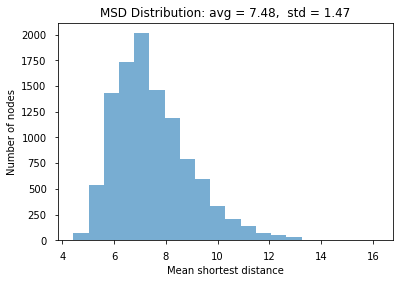

In [63]:
from scipy.stats import norm
from scipy import stats

msd_values = list(msds.values())
mean = np.mean(msd_values)
std = np.std(msd_values)

plt.figure()
plt.hist(msd_values, bins=20, alpha=0.6)
plt.ylabel('Number of nodes')
plt.xlabel('Mean shortest distance')

title = "MSD Distribution: avg = %.2f,  std = %.2f" % (mean, std)
plt.title(title)


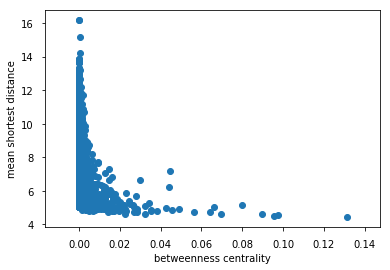

In [65]:
msd_centralties = {} #node, betweenness centrality
for node, ms in msds.items():
    bet_cen = betweenness_centrality[node]
    msd_centralties[node] = (ms, bet_cen)
    
msd_values = [ms for ms, cen in msd_centralties.values()]
cents = [cen for ms, cen in msd_centralties.values()]

fig, ax = plt.subplots()
plt.xlabel('betweenness centrality')
plt.ylabel('mean shortest distance')
ax.scatter(cents, msd_values)

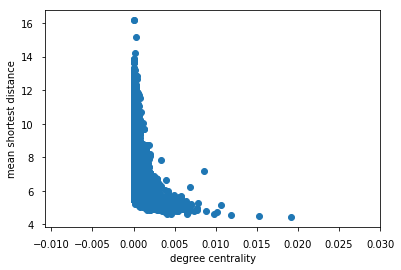

In [67]:
msd_deg_centralties = {} #node, betweenness centrality
for node, ms in msds.items():
    deg_cen = degree_centrality[node]
    msd_deg_centralties[node] = (ms, deg_cen)
    
msd_values = [ms for ms, cen in msd_deg_centralties.values()]
cents = [cen for ms, cen in msd_deg_centralties.values()]

fig, ax = plt.subplots()
plt.xlabel('degree centrality')
plt.ylabel('mean shortest distance')
ax.scatter(cents, msd_values)

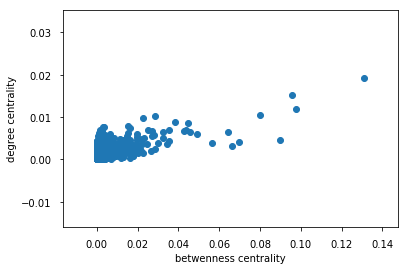

In [81]:
bet_deg_centralties = {} #node, betweenness centrality
for node, bet_cen in betweenness_centrality.items():
    deg_cen = degree_centrality[node]
    bet_deg_centralties[node] = (bet_cen, deg_cen)
    
bet_cen_values = [bet_cen for bet_cen, deg_cen in bet_deg_centralties.values()]
deg_cen_values = [deg_cen for bet_cen, deg_cen in bet_deg_centralties.values()]

fig, ax = plt.subplots()
plt.xlabel('betwenness centrality')
plt.ylabel('degree centrality')
ax.scatter(bet_cen_values, deg_cen_values)


In [97]:
inverted_msds = {}
for node, msd in msds.items():
    inverted_msds[node] = 1/msd

nx.set_node_attributes(G, betweenness_centrality, 'betweenness')
nx.set_node_attributes(G, msds, 'msd')
nx.set_node_attributes(G, inverted_msds, 'invertedmsd')
nx.write_gml(G, "output/pgp_msd.gml", stringizer=str)

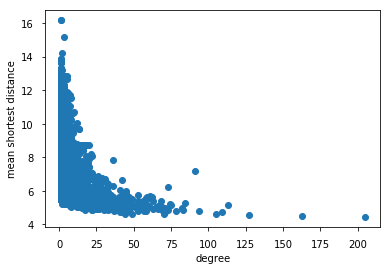

In [99]:
centralities = {} #node, degree, betweenness centrality
for deg in G.degree():
    msd = msds[deg[0]]
    centralities[deg[0]] = (deg[1], msd)
    
degs = [deg for deg, msd in centralities.values()]
msd_vals = [msd for deg, msd in centralities.values()]
   
fig, ax = plt.subplots()
plt.xlabel('degree')
plt.ylabel('mean shortest distance')
ax.scatter(degs, msd_vals)
#l = mlines.Line2D([0,205], [0.04,0.04], color='red')

Links:
- https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/